<a href="https://colab.research.google.com/github/Mwadz/KNN-and-The-Naive-Bayes-Classifier/blob/Native-Bayes/Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=orange>Objectives</font>

> To implemented the most appropriate Naïve Bayes Classifier following the best practices of optimization. 
These include:
* feature selection
* splitting the data into subsets to use in modeling.

> To interpret the feature selection done and models created.

# Question Definition
**a) Objective**

To determine whether an email is spam or not .

**b) Success Metric**

* Delivering a naive bayes model that predicts whether an email is spam or not with an accuracy of at least 80%
* evaluating the differences brought about by different splits, parameters and types of naive bayes

**c) Context**

The data available for this project was collected by UCI Machine Learning Centre. It is a collection of spam e-mails that came from their postmaster and individuals who had filed spam. The collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

**d) Experimental Design**

The process will entail:
> Read and explore the given dataset.

> Defining the appropriateness of the available data to answer the given question.

> Finding and deal with outliers, anomalies, and missing data within the dataset.

> Perform Exploratory data analysis and recording my observations.

> Building the naive bayes models using different dataset splits(80-20, 70-30, 60-40) for the train and test set and make observations of the model performance.

> Optimizing the model performance and challenging the solution

> Giving a conclusion and recommendations from the analysis.

**e) Data Relevance**

The data provided is very relevant and has a wide range of variables to consider in achieving our main objective of this project.

Data Glossary:

    48 continuous real [0,100] attributes of type word_freq_WORD = percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

    6 continuous real [0,100] attributes of type char_freq_CHAR] = percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

    1 continuous real [1,...] attribute of type capital_run_length_average = average length of uninterrupted sequences of capital letters

    1 continuous integer [1,...] attribute of type capital_run_length_longest = length of longest uninterrupted sequence of capital letters

    1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail

    1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

# Data Loading

In [59]:
# reading our dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


spam = pd.read_csv('/content/spambase.csv')

In [60]:
# previewing our dataset
spam.head(3)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1


In [61]:
spam.shape

(4600, 58)

* The names document in the UCI website has the following column names;

  'word_freq_make'  ,'word_freq_address' ,'word_freq_all' ,'word_freq_3d' ,'word_freq_our'        
,'word_freq_over' ,'word_freq_remove' ,'word_freq_internet' ,'word_freq_order' ,'word_freq_mail'       
,'word_freq_receive' ,'word_freq,_will' ,'word_freq_people' ,'word_freq_report' ,'word_freq_addresses'  
,'word_freq_free' ,'word_freq_business' ,'word_freq_email' ,'word_freq_you' ,'word_freq_credit'     
,'word_freq_your' ,'word_freq_font' ,'word_freq_000' ,'word_freq_money' ,'word_freq_hp'         
,'word_freq_hpl' ,'word_freq_george' ,'word_freq_650' ,'word_freq_lab' ,'word_freq_labs'       
,'word_freq_telnet' ,'word_freq_857' ,'word_freq_data' ,'word_freq_415' ,'word_freq_85' ,'word_freq_technology' 
,'word_freq_1999' ,'word_freq_parts' ,'word_freq_pm' ,'word_freq_direct' ,'word_freq_cs' ,'word_freq_meeting'    
,'word_freq_original' ,'word_freq_project' ,'word_freq_re' ,'word_freq_edu' ,'word_freq_table' ,'word_freq_conference' 
,'char_freq_;' ,'char_freq_(' ,'char_freq_[' ,'char_freq_!' ,'char_freq_$' ,'char_freq_#','capital_run_length_average'
,'capital_run_length_longest' ,'capital_run_length_total'

* these are 57 in number. The dataset has 58 columns and the last column is unnamed. It is infact the target so we'll name it so.
* they're all denoted as continuous which suggests the whole df should be in float datatype

In [62]:
# puttin names on a list cols
cols = ['word_freq_make'  ,'word_freq_address' ,'word_freq_all' ,'word_freq_3d' ,'word_freq_our'        
,'word_freq_over' ,'word_freq_remove' ,'word_freq_internet' ,'word_freq_order' ,'word_freq_mail'       
,'word_freq_receive' ,'word_freq,_will' ,'word_freq_people' ,'word_freq_report' ,'word_freq_addresses'  
,'word_freq_free' ,'word_freq_business' ,'word_freq_email' ,'word_freq_you' ,'word_freq_credit'     
,'word_freq_your' ,'word_freq_font' ,'word_freq_000' ,'word_freq_money' ,'word_freq_hp'         
,'word_freq_hpl' ,'word_freq_george' ,'word_freq_650' ,'word_freq_lab' ,'word_freq_labs'       
,'word_freq_telnet' ,'word_freq_857' ,'word_freq_data' ,'word_freq_415' ,'word_freq_85' ,'word_freq_technology' 
,'word_freq_1999' ,'word_freq_parts' ,'word_freq_pm' ,'word_freq_direct' ,'word_freq_cs' ,'word_freq_meeting'    
,'word_freq_original' ,'word_freq_project' ,'word_freq_re' ,'word_freq_edu' ,'word_freq_table' ,'word_freq_conference' 
,'char_freq_;' ,'char_freq_(' ,'char_freq_[' ,'char_freq_!' ,'char_freq_$' ,'char_freq_#','capital_run_length_average'
,'capital_run_length_longest' ,'capital_run_length_total', 'target' ]
# reloading the dataset using the names
spam = pd.read_csv('/content/spambase.csv', sep = ',', names = cols)
spam.head(3)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1


* renaming the columns is successful

# Data Cleaning

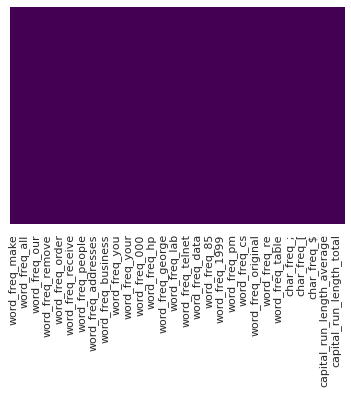

In [63]:
# Checking for missing values
sns.heatmap(spam.isnull(),yticklabels=False,cbar=False, cmap="viridis");

* there appears to be no missing values but let's just check to be sure:

In [64]:
spam.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq,_will               0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

* there are no null values

In [65]:
# checking for duplicate reccords
spam.duplicated().sum()

391

In [66]:
# dropping the 391 duplicate values
spam.drop_duplicates(keep=False, inplace=True)
# confirming
spam.duplicated().sum()

0

In [67]:
# cheking datatypes
spam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4030 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4030 non-null   float64
 1   word_freq_address           4030 non-null   float64
 2   word_freq_all               4030 non-null   float64
 3   word_freq_3d                4030 non-null   float64
 4   word_freq_our               4030 non-null   float64
 5   word_freq_over              4030 non-null   float64
 6   word_freq_remove            4030 non-null   float64
 7   word_freq_internet          4030 non-null   float64
 8   word_freq_order             4030 non-null   float64
 9   word_freq_mail              4030 non-null   float64
 10  word_freq_receive           4030 non-null   float64
 11  word_freq,_will             4030 non-null   float64
 12  word_freq_people            4030 non-null   float64
 13  word_freq_report            4030 

* datatypes seem in order

In [68]:
# checking the column names
spam.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq,_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',

In [69]:
# checking for outliers
for k, v in spam.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1

  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]

  perc = np.shape(v_col)[0] * 100.0 / np.shape(spam)[0]
  print("Columns %s outliers = %.2f%%" % (k, perc))

Columns word_freq_make outliers = 100.00%
Columns word_freq_address outliers = 100.00%
Columns word_freq_all outliers = 7.12%
Columns word_freq_3d outliers = 100.00%
Columns word_freq_our outliers = 10.72%
Columns word_freq_over outliers = 100.00%
Columns word_freq_remove outliers = 100.00%
Columns word_freq_internet outliers = 100.00%
Columns word_freq_order outliers = 100.00%
Columns word_freq_mail outliers = 17.82%
Columns word_freq_receive outliers = 100.00%
Columns word_freq,_will outliers = 5.98%
Columns word_freq_people outliers = 100.00%
Columns word_freq_report outliers = 100.00%
Columns word_freq_addresses outliers = 100.00%
Columns word_freq_free outliers = 20.32%
Columns word_freq_business outliers = 100.00%
Columns word_freq_email outliers = 100.00%
Columns word_freq_you outliers = 1.32%
Columns word_freq_credit outliers = 100.00%
Columns word_freq_your outliers = 4.49%
Columns word_freq_font outliers = 100.00%
Columns word_freq_000 outliers = 100.00%
Columns word_freq_mon

* there seems to be some outliers but this is most probably due to the fact that it may be normal for some emails to have similar repetitive content. 

# Exploratory Data Analysis

## Univariate Analysis



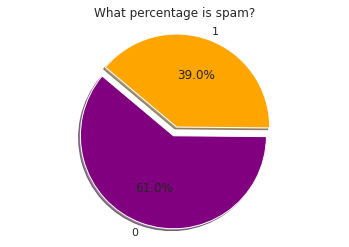

In [70]:
# finding out what proportion makes up spam emails 
plt.pie(spam['target'].value_counts(normalize=True), labels =spam['target'].value_counts().index,colors = ['purple', 'orange'], autopct = '%1.1f%%', shadow = True, explode = [0,0.1], startangle = 140)
plt.axis('equal')
plt.title('What percentage is spam?')
plt.show()

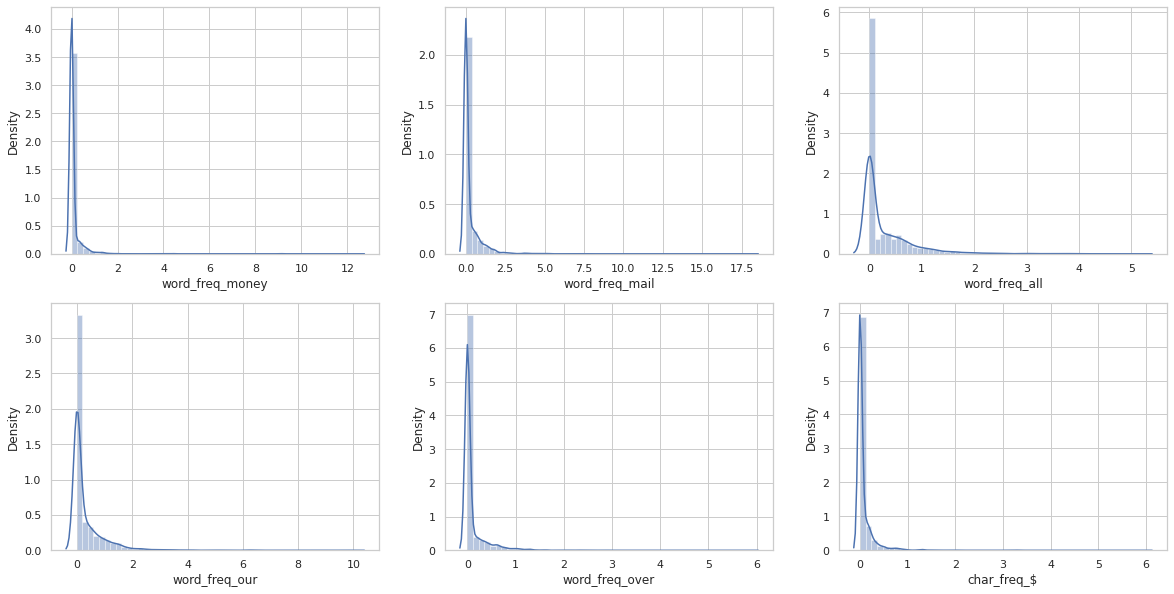

In [71]:
# getting rid of warnings
import warnings
warnings.filterwarnings("ignore")
# exploring categorical data using count plots
figbi, axes = plt.subplots(2, 3, figsize=(20, 10))# we'll use this so we can plot them all in one chart for a cummulative read
sns.distplot(spam['word_freq_money'], kde=True,ax=axes[0,0])
sns.distplot(spam['word_freq_mail'], kde=True,ax=axes[0,1])
sns.distplot(spam['word_freq_all'], kde=True,ax=axes[0,2])
sns.distplot(spam['word_freq_our'], kde=True,ax=axes[1,0])
sns.distplot(spam['word_freq_over'], kde=True,ax=axes[1,1])
sns.distplot(spam['char_freq_$'], kde=True,ax=axes[1,2])
plt.show()

In [72]:
spam.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq,_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',

## Bivariate Analysis

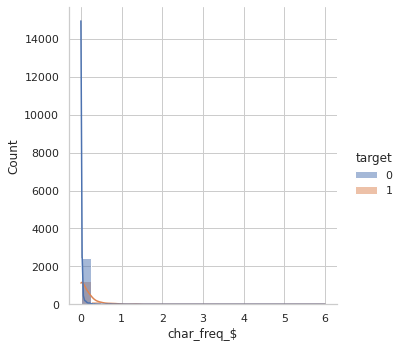

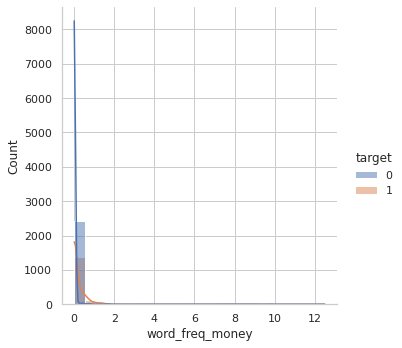

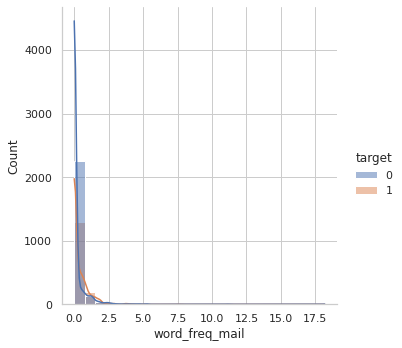

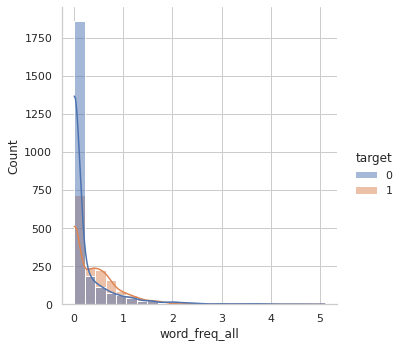

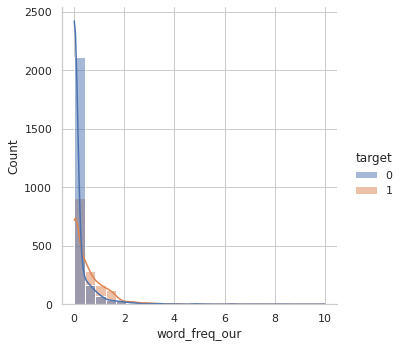

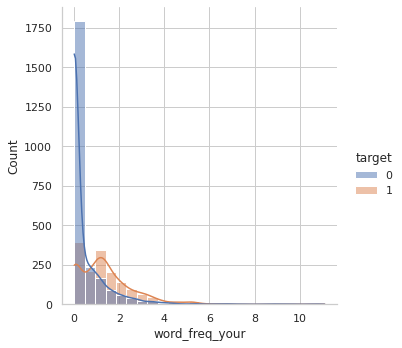

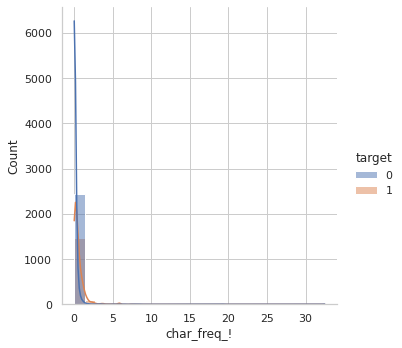

In [73]:
# defining a function to return distribution plots for words all, $, money, mail, our and over
def distplot(df, col, col2):
  sns.displot(data = df, x = col, hue = col2, bins = 24, kde=True)

x =['char_freq_$','word_freq_money','word_freq_mail','word_freq_all','word_freq_our','word_freq_your','char_freq_!']
for i in x:
  distplot(spam, i, 'target')
  plt.show()


**Observations**
* Surprisingly the symbol '$' and the word 'money' are not associated with alot of spam email as expected

* 'mail' is quite a common word and still seems to be associated with spam mail.
* most emails with the word 'your' or 'all' were spam a well

In [74]:
import matplotlib.pyplot as plt
!pip install heatmapz


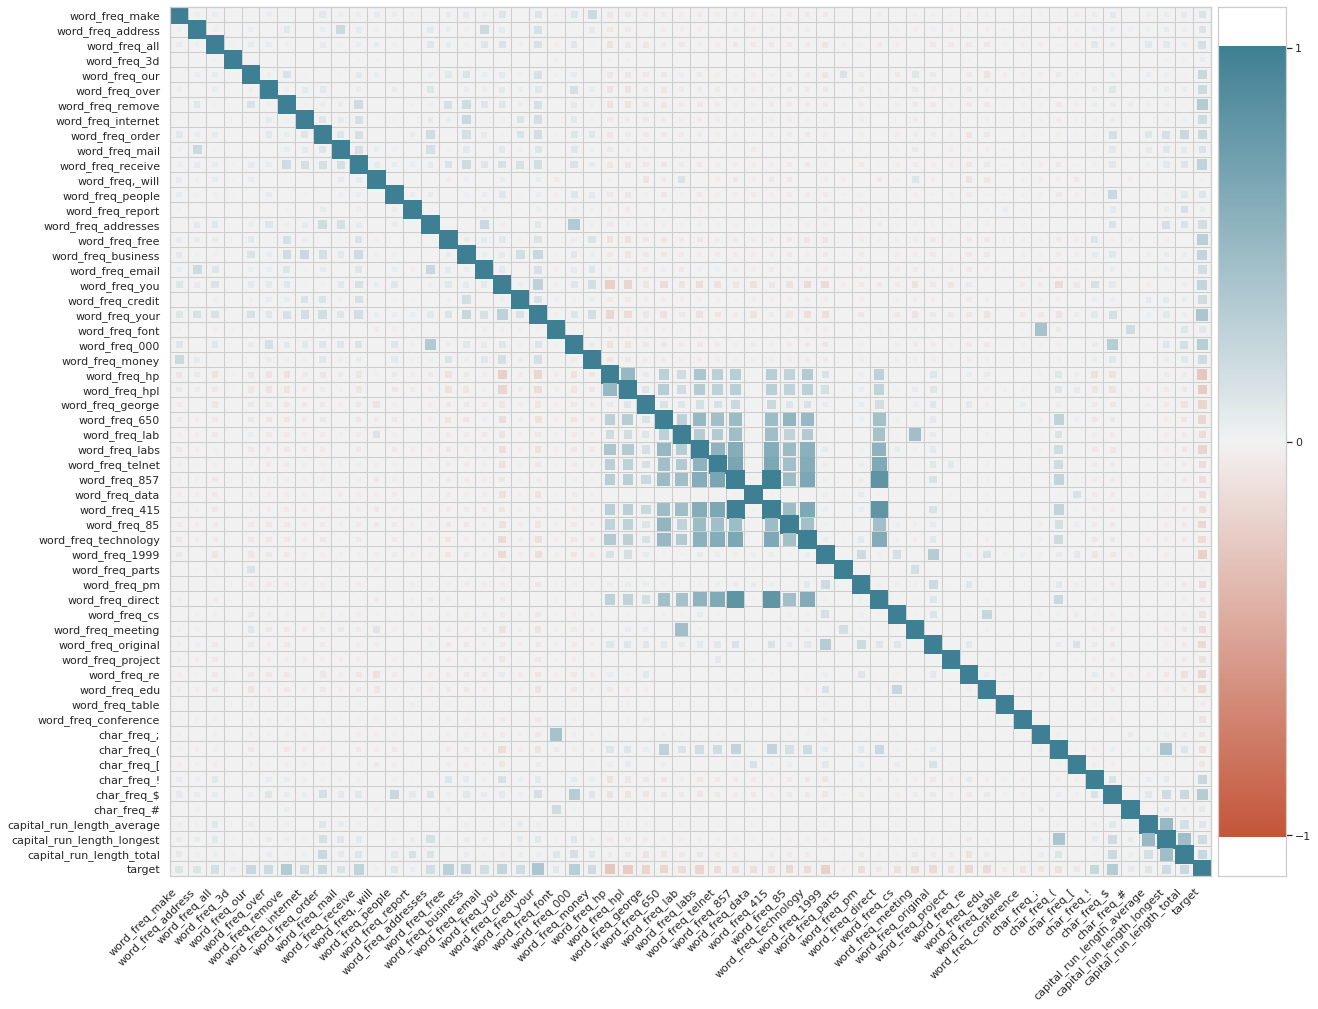

In [75]:
# Importing the two methods from heatmap library
from heatmap import heatmap, corrplot

# checking for correlation in the rank dataset
plt.figure(figsize=(20, 16))
corrplot(spam.corr(), size_scale=300);

**Observations**
* the features/ columns represening the words;
over, remove, receive, free, business, you, your, 000, ! and $ seem to have a positive correlation to the target feature which means the word and symbols are associated with spam mail

* The words and or numbers hp, hpl, george, 650, lab, labs, telnet, 857, data, 415, 85, technology, 1999, parts, pm, direct, cs, meeting, original, project, re, edu, table,conference, and the symbols ';','(' and '[' all seem to have a negative correlation to the target variabke therefore are least associated with spam mail  

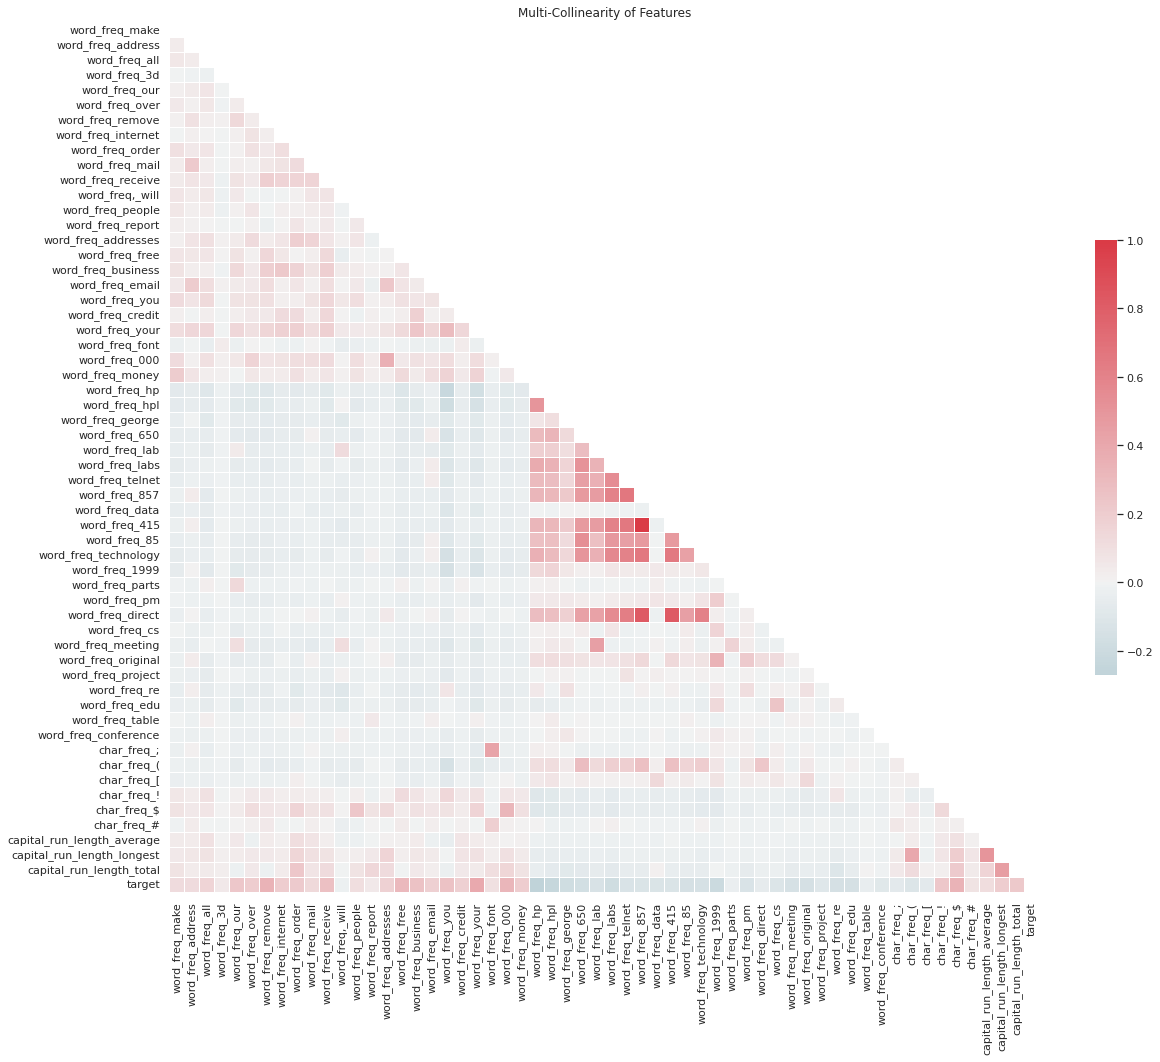

In [76]:
#@title Multicollinearity
sns.set(style="whitegrid")
# Create a covariance matrix
corr = spam.corr()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,16))
# Draw the heatmap with the mask and correct aspect ratio
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features');

In [77]:
spam.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq,_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',

In [78]:
#@title Variance Inflation Factor
# importing vif method
from statsmodels.stats.outliers_influence import variance_inflation_factor
#using variance inflation factor to check correlation
s = spam[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq,_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'target']]
# creating a dataframe
vif = pd.DataFrame()
vif["feature"] = s.columns
  
# calculating VIF for each feature
vif["vif"] = [variance_inflation_factor(s.values, i)
                          for i in range(len(s.columns))]
# displaying dataframe
vif

,feature,vif
0,word_freq_make,1.224319
1,word_freq_address,1.236899
2,word_freq_all,1.402597
3,word_freq_3d,1.010397
4,word_freq_our,1.369961
5,word_freq_over,1.194382
6,word_freq_remove,1.307540
7,word_freq_internet,1.196882
8,word_freq_order,1.313122
9,word_freq_mail,1.291570


* the column representing the occurence of the number 415 has an IVF of 97 which is obscenely high so we'll have to take it out to restore normalcy within the dataset

In [79]:
#@title VIF -415
# importing vif method
from statsmodels.stats.outliers_influence import variance_inflation_factor
#using variance inflation factor to check correlation
s = spam[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq,_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'target']]
# creating a dataframe
vif = pd.DataFrame()
vif["feature"] = s.columns
  
# calculating VIF for each feature
vif["vif"] = [variance_inflation_factor(s.values, i)
                          for i in range(len(s.columns))]
# displaying dataframe
vif

,feature,vif
0,word_freq_make,1.220690
1,word_freq_address,1.235688
2,word_freq_all,1.402476
3,word_freq_3d,1.010396
4,word_freq_our,1.369932
5,word_freq_over,1.194353
6,word_freq_remove,1.307462
7,word_freq_internet,1.196849
8,word_freq_order,1.312945
9,word_freq_mail,1.291500


* let's now try taking out 857 cause it's slightly high at 4 and see whether we can maintain them below 3.6

In [80]:
#@title VIF - 857
# importing vif method
from statsmodels.stats.outliers_influence import variance_inflation_factor
#using variance inflation factor to check correlation
s = spam[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq,_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_data', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'target']]
# creating a dataframe
vif = pd.DataFrame()
vif["feature"] = s.columns
  
# calculating VIF for each feature
vif["vif"] = [variance_inflation_factor(s.values, i)
                          for i in range(len(s.columns))]
# displaying dataframe
vif

,feature,vif
0,word_freq_make,1.219997
1,word_freq_address,1.217523
2,word_freq_all,1.400931
3,word_freq_3d,1.010378
4,word_freq_our,1.369631
5,word_freq_over,1.194195
6,word_freq_remove,1.307462
7,word_freq_internet,1.196273
8,word_freq_order,1.312847
9,word_freq_mail,1.288721


* the features are now in good condition for modeling

In [81]:
# dropping the columns with high correlation
traind = spam.drop(['word_freq_415','word_freq_857'], axis=1)

# Gausian Naive Bayes

**How it works:**

suppose the training data contains a continuous attribute x. We first segment the data by the class, and then compute the mean and variance of x in each class.

* We use this type of naive bayes when we have continuous attribute values. * Let's make an assumption that the values associated with each class are distributed normally.



In [82]:
# We will first use the Gausian Naive Bayes
# lets import the libraries needed
X = spam.drop('target', 1)
y = spam['target']

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics

# listing the splits 
splits = [0.2, 0.3, 0.4]

# looping through the splits in the list. 
for i in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, random_state = 0)
    
    # Fitting to the classifier
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)

    print("\n test size: {} gives an accuracy score of : ".format(i), (metrics.accuracy_score(y_test, y_pred)*100))
    print(" test size: {} gives an F1_score of : ".format(i), (metrics.f1_score(y_test, y_pred)*100))


 test size: 0.2 gives an accuracy score of :  82.25806451612904
 test size: 0.2 gives an F1_score of :  81.4526588845655

 test size: 0.3 gives an accuracy score of :  83.54011579818031
 test size: 0.3 gives an F1_score of :  82.37378210806023

 test size: 0.4 gives an accuracy score of :  84.30521091811414
 test size: 0.4 gives an F1_score of :  83.166999334664


### Cross Validation

In [83]:
# Let's see whether we can improve that score

from sklearn.model_selection import cross_val_score

Cross_validated_gnb = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated mnb 5 fold : {:.4f}'.format(Cross_validated_gnb))

# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores 10 :{}'.format(scores))

Cross validated mnb 5 fold : 0.9454
Cross-validation scores 10 :[0.84710744 0.84710744 0.85123967 0.83471074 0.80165289 0.84297521
 0.83057851 0.84297521 0.82572614 0.86307054]


# Multinomial Naive Bayes

* This algorithm is preferred to use on data that is multinomially distributed. 

* Multinomial Naive Bayes algorithims are one of the standard algorithms used in text categorization classification.

* With this model, samples (feature vectors) represent the frequencies with which certain events have been generated by a multinomial (p1, . . . ,pn) where pi is the probability that event i occurs.

In [87]:
from sklearn.naive_bayes import MultinomialNB

test_size = [0.2, 0.3, 0.4]

# the for loop is to make sure that all the test sizes are called. 
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, random_state = 0)
    
    # Fitting to the classifier
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    y_pred = mnb.predict(X_test)

# eval
    print("\n test size: {} gives an accuracy score of : ".format(i), (metrics.accuracy_score(y_test, y_pred)*100))
    print(" test size: {} gives an F1_score of : ".format(i), (metrics.f1_score(y_test, y_pred)*100))


 test size: 0.2 gives an accuracy score of :  79.28039702233251
 test size: 0.2 gives an F1_score of :  73.70078740157481

 test size: 0.3 gives an accuracy score of :  80.23159636062861
 test size: 0.3 gives an F1_score of :  74.16216216216216

 test size: 0.4 gives an accuracy score of :  79.52853598014889
 test size: 0.4 gives an F1_score of :  73.55769230769232


### Cross Validation

In [85]:
# the best score's at 74... can we get more?

from sklearn.model_selection import cross_val_score

Cross_validated_mnb = cross_val_score(mnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated mnb 5 fold : {:.4f}'.format(Cross_validated_mnb))

# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(mnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores 10 :{}'.format(scores))

Cross validated mnb 5 fold : 0.8139
Cross-validation scores 10 :[0.74380165 0.79752066 0.78512397 0.7768595  0.80578512 0.80578512
 0.73966942 0.77272727 0.77593361 0.81742739]


# Challanging the Solution

For this challange I'd like to use logistic regression seeing as it's one of the most popular machine learning algorithms and is built for this kind of dataset where the target variable is binary and mostbother features are either integers or floats(in this case all)

In [86]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

# Define features and labels  
X = spam.drop('target', 1)
y = spam['target']


# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# scaling the features.
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train and fit model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Using our model to make a prediction
#
y_pred = logreg.predict(X_test)

# calculate accuracy
from sklearn.metrics import confusion_matrix,accuracy_score

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
accuracy_score(y_test, y_pred)

[[452  17]
 [ 43 294]]


0.9255583126550868

# **Conclusion**
* By all means this type of dataset should be modeled using Logistic regression algrithims seeing as it produced the highest accuracy of allwithout optimization.

* gausian naive bayes however performed quite well after cross validation at 94 from 84 while multinomial naive bayes improved from 80 to 81 after cross validation.

* the confusion matrix on Logitic regression;

[[452 17]<br>
 [ 43 294]]

True Positives(TP) =  452

True Negatives(TN) =  294

False Positives(FP) =  17

False Negatives(FN) =  43

The confusion matrix shows 452 + 294 = 746 correct predictions and 17 + 43 = 60 incorrect predictions.

**Recomendations**
* the use of cross valdation to optimize models.
* the use of logistic regression for a quick and accurate model when handling numerical data with binary target variable such as our dataset 

**Follow up questions**
**a) Did we have the right data?**

The data was sufficient with 57 features.

**b) Was the data sufficient to answer the question?**

Yes, the data was enough. 

**c) Did we have the right question.**

The question was right

###<font color = 'orange'>Sidenote</font>

update it by running the following commands.

> git branch -m main Native-Bayes

> git fetch origin

> git branch -u origin/Native-Bayes Native-Bayes

> git remote set-head origin -a